# 1.

In [167]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
df = pd.read_csv('.\data\AnimalWeights2.csv', header=1, sep=',')
df = df.rename(index=str, columns={"Body (kg)":"Body", "Brain (g)":"Brain"})
df

,Body,Brain
0,45.60,42.95
1,1.00,2.27
2,1.70,5.21
3,0.96,2.14
4,30.27,38.86
5,2.77,9.49
6,0.19,0.59
7,9.03,9.30
8,1.68,4.10
9,5.58,14.01


## a)

### mean and std dev

In [169]:
# Body weight's mean and standard deviation
body_stat = df['Body'].describe()
body_stat

count    55.000000
mean      4.839636
std       7.789781
min       0.100000
25%       0.830000
50%       1.700000
75%       5.960000
max      45.600000
Name: Body, dtype: float64

In [170]:
# Brain weight's mean and standard deviation
brain_stat = df['Brain'].describe()
brain_stat

count    55.000000
mean      7.226000
std       8.375302
min       0.430000
25%       2.120000
50%       4.060000
75%       9.440000
max      42.950000
Name: Brain, dtype: float64

In [171]:
# Correlation between body and brain weight
r_sq = df['Body'].corr(df['Brain'])
print(f'r^2 = {r_sq}')

r^2 = 0.9382983370164698


In [172]:
# Developing a linear model

import statsmodels.formula.api as sm

def regress_linearly(df):
    model = sm.ols(formula="Body ~ Brain", data=df)
    fitted = model.fit()
    return fitted.summary()

regress_linearly(df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Body   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     390.2
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           4.21e-26
Time:                        22:19:27   Log-Likelihood:                -132.04
No. Observations:                  55   AIC:                             268.1
Df Residuals:                      53   BIC:                             272.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4665      0.486     -3.016      0.004      -2.442      -0.491
Brain          0.8727      0.044     19.752      0.000       0.784       0.961
==============================================================================
Omnibus:                       31.527   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.689
Skew:                          -1.151   Prob(JB):                     5.30e-43
Kurtosis:                      11.925   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

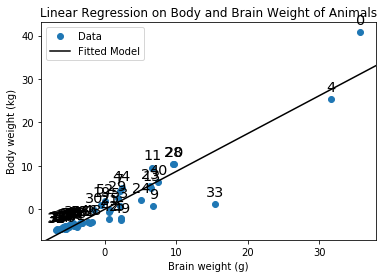

In [173]:
import statsmodels.api as smapi

def plot_regression(df):
    fig = smapi.graphics.plot_partregress("Body", "Brain", [], data=df)
    plt.title('Linear Regression on Body and Brain Weight of Animals')
    plt.xlabel('Brain weight (g)')
    plt.ylabel('Body weight (kg)')
    plt.legend(['Data', 'Fitted Model'])
    plt.show()
    
plot_regression(df)

## b)

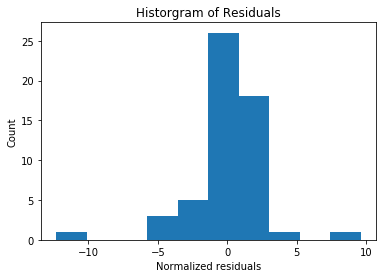

In [161]:
def plot_resid_hist(fitted):
    plt.hist(fitted.resid)
    plt.ylabel('Count')
    plt.xlabel('Normalized residuals')
    plt.title('Historgram of Residuals')
    plt.show()
    
plot_resid_hist(fitted)

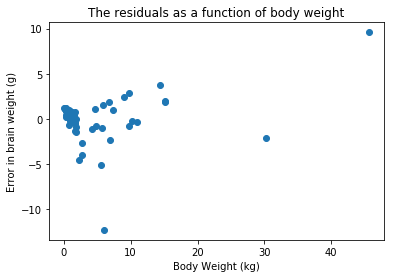

In [162]:
def plot_resid_body(fitted):
    plt.scatter(df['Body'], fitted.resid)
    plt.title('The residuals as a function of body weight')
    plt.xlabel('Body Weight (kg)')
    plt.ylabel('Error in brain weight (g)')
    plt.show()
    
plot_resid_body(fitted)

## c)

In [179]:
# Adding Brontosaurs to the data
bronto_data = pd.DataFrame([{"Body":200, "Brain":10}])
df = df.append(bronto_data, ignore_index=True)

In [164]:
# Rebuilding the model
regress_linearly(df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Body   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     5.693
Date:                Tue, 27 Nov 2018   Prob (F-statistic):             0.0206
Time:                        22:18:47   Log-Likelihood:                -261.13
No. Observations:                  56   AIC:                             526.3
Df Residuals:                      54   BIC:                             530.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9687      4.656      0.208      0.836      -8.366      10.303
Brain          1.0111      0.424      2.386      0.021       0.161       1.861
==============================================================================
Omnibus:                      122.808   Durbin-Watson:                   1.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6231.513
Skew:                           7.135   Prob(JB):                         0.00
Kurtosis:                      52.669   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Result of adding brontosaurus:
- $R^2$ changed from $0.880$ to $0.095$
- The model before adding Brontosaurus has a much better $R^2$

## d) $\log{brainweight}$

In [186]:
# Rereading data to remove brontosaurus
df = pd.read_csv('.\data\AnimalWeights2.csv', header=1, sep=',')
df = df.rename(index=str, columns={"Body (kg)":"Body", "Brain (g)":"Brain"})

df['Brain'] = df['Brain'].apply(np.log)

In [187]:
regress_linearly(df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Body   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     55.05
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           9.52e-10
Time:                        22:28:51   Log-Likelihood:                -170.85
No. Observations:                  55   AIC:                             345.7
Df Residuals:                      53   BIC:                             349.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5057      1.237     -2.025      0.048      -4.988      -0.024
Brain          5.1087      0.689      7.420      0.000       3.728       6.490
==============================================================================
Omnibus:                       62.397   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.089
Skew:                           3.017   Prob(JB):                    3.07e-103
Kurtosis:                      16.023   Cond. No.                         3.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

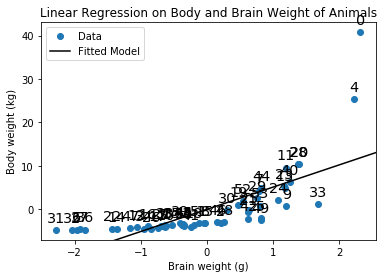

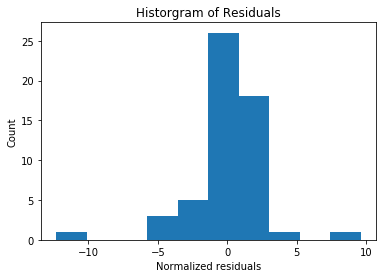

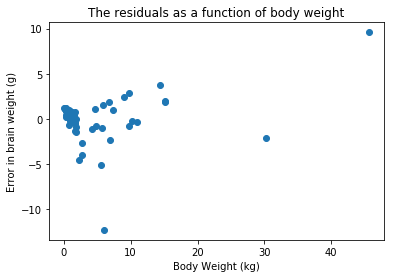

In [188]:
plot_regression(df)
plot_resid_hist(fitted)
plot_resid_body(fitted)

- Non-log version (the previous model) seems to be a better model, as it has much higher correlation and it fits better with the data

### e) $\log{body weight}$

In [189]:
df = pd.read_csv('.\data\AnimalWeights2.csv', header=1, sep=',')
df = df.rename(index=str, columns={"Body (kg)":"Body", "Brain (g)":"Brain"})

df['Body'] = df['Body'].apply(np.log)

In [190]:
regress_linearly(df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Body   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     95.91
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           1.74e-13
Time:                        22:29:54   Log-Likelihood:                -67.910
No. Observations:                  55   AIC:                             139.8
Df Residuals:                      53   BIC:                             143.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3020      0.151     -1.993      0.051      -0.606       0.002
Brain          0.1348      0.014      9.793      0.000       0.107       0.162
==============================================================================
Omnibus:                        3.478   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.353
Skew:                          -0.581   Prob(JB):                        0.187
Kurtosis:                       2.667   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

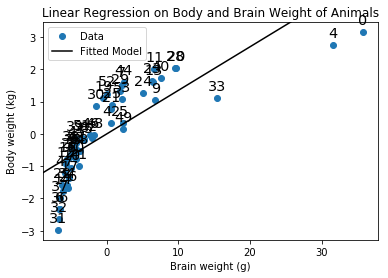

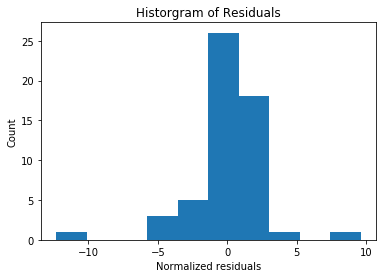

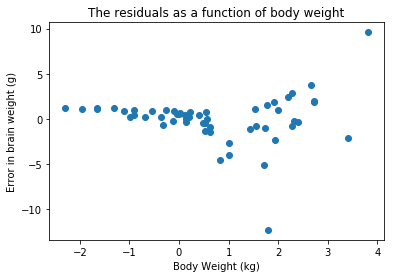

In [191]:
plot_regression(df)
plot_resid_hist(fitted)
plot_resid_body(fitted)

- The data now looks like a log function and it does have better $R^2$ than d), but still worse $R^2$ than the original model

### Slope for each models look like medium, low, and high, respectively.

## 2. Russian Population Analysis

In [210]:
rp = pd.read_csv('./data/russian_population.csv', sep=',', header=None, thousands=',')
rp.columns = ['year', 'population']
rp

,year,population
0,1897,125600000
1,1911,167000000
2,1920,138000000
3,1926,147000000
4,1937,162000000
5,1939,168524000
6,1941,196716000
7,1946,170548000
8,1951,182321000
9,1959,209035000


In [215]:
# Applying log to population
rp['population'] = rp['population'].apply(np.log)
rp

,year,population
0,1897,2.925772
1,1911,2.940933
2,1920,2.930808
3,1926,2.934173
4,1937,2.939326
5,1939,2.941413
6,1941,2.949545
7,1946,2.942043
8,1951,2.945558
9,1959,2.952721


In [220]:
model = sm.ols(formula="year ~ population", data=rp)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.564
Date:                Tue, 27 Nov 2018   Prob (F-statistic):              0.226
Time:                        22:58:16   Log-Likelihood:                -102.95
No. Observations:                  21   AIC:                             209.9
Df Residuals:                      19   BIC:                             212.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.3561   1544.763      0.021      0.984   -3200.870    3265.582
population   655.7243    524.347      1.251      0.226    -441.747    1753.195
==============================================================================
Omnibus:                        1.194   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.550   Jarque-Bera (JB):                1.014
Skew:                           0.335   Prob(JB):                        0.602
Kurtosis:                       2.158   Cond. No.                         679.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

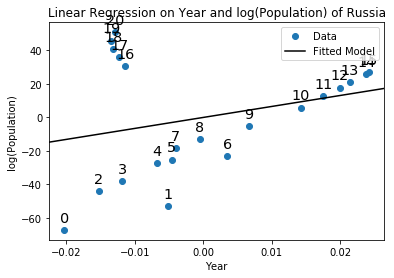

In [221]:
fig = smapi.graphics.plot_partregress("year", "population", [], data=rp)
plt.title('Linear Regression on Year and log(Population) of Russia')
plt.xlabel('Year')
plt.ylabel('log(Population)')
plt.legend(['Data', 'Fitted Model'])
plt.show()

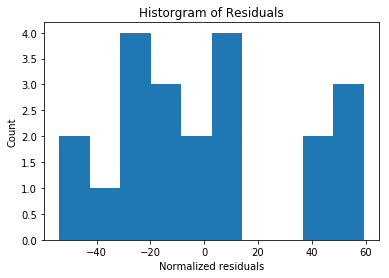

In [222]:
plt.hist(fitted.resid)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
plt.title('Historgram of Residuals')
plt.show()

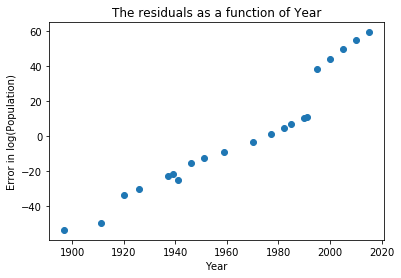

In [224]:
plt.scatter(rp['year'], fitted.resid)
plt.title('The residuals as a function of Year')
plt.xlabel('Year')
plt.ylabel('Error in log(Population)')
plt.show()

- Since $R^2$ value is extremely low, the linear model is not a very good model.
- However, if one looks at the scatterplot, there are only a few outliers that skew that model significantly. If those points are removed, the model will be a much better predictor of the Russian population.
- It seems that Soviet time's population data greatly skews the whole model.